# **Building a CNN model for Classification of Flowers**



**1. Load the Dataset**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
batch_size = 32
img_height = 64
img_width = 64
data_dir = "/content/drive/MyDrive/Flowers-Dataset/flowers"

**2. Image Augmentation**

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255, horizontal_flip = True, vertical_flip = True, zoom_range = 0.2)

In [5]:
x_train = train_datagen.flow_from_directory(r"/content/drive/MyDrive/Flowers-Dataset/flowers", target_size = (64,64) , class_mode = "categorical", batch_size = 100)

Found 4327 images belonging to 5 classes.


In [6]:
data_augmentation = Sequential(
  [
    layers.RandomFlip("horizontal",input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

**3. Model Building and also Split dataset into training and testing sets**

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
model = Sequential()

In [8]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4327 files belonging to 5 classes.
Using 3462 files for training.


In [9]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4327 files belonging to 5 classes.
Using 865 files for validation.


In [10]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


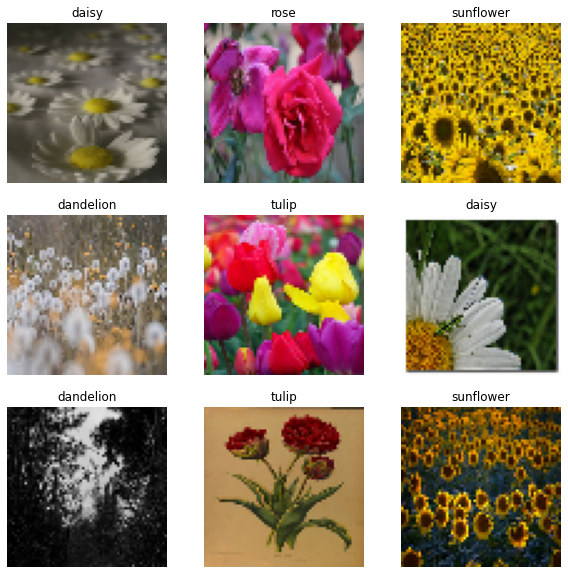

In [11]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

**4. Adding the layers (Convolution,MaxPooling,Flatten,Dense-(HiddenLayers),Output)**

In [12]:
# model.add(Convolution2D(32, (3,3), activation = "relu", input_shape = (64,64,3) ))
# model.add(MaxPooling2D(pool_size = (2,2)))
# model.add(Flatten())
# model.add(Dense(300, activation = "relu"))
# model.add(Dense(150, activation = "relu")) #mulitple dense layers
# model.add(Dense(5, activation = "softmax")) #output layer

In [13]:
num_classes = len(class_names)

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

**5. Compile The Model**

In [14]:
model.compile(loss = "categorical_crossentropy", metrics = ["accuracy"], optimizer = "adam")
len(x_train)

44

**6. Fit The Model**

In [31]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
109/109 [==============================] - 32s 274ms/step - loss: 1.0461 - accuracy: 0.5748 - val_loss: 1.0963 - val_accuracy: 0.5792
Epoch 2/10
109/109 [==============================] - 28s 250ms/step - loss: 0.9458 - accuracy: 0.6199 - val_loss: 1.0794 - val_accuracy: 0.5838
Epoch 3/10
109/109 [==============================] - 28s 249ms/step - loss: 0.8919 - accuracy: 0.6453 - val_loss: 0.9920 - val_accuracy: 0.6185
Epoch 4/10
109/109 [==============================] - 28s 251ms/step - loss: 0.8553 - accuracy: 0.6638 - val_loss: 0.8845 - val_accuracy: 0.6624
Epoch 5/10
109/109 [==============================] - 28s 250ms/step - loss: 0.8355 - accuracy: 0.6696 - val_loss: 0.9148 - val_accuracy: 0.6566
Epoch 6/10
109/109 [==============================] - 28s 255ms/step - loss: 0.7908 - accuracy: 0.6979 - val_loss: 1.0649 - val_accuracy: 0.6173
Epoch 7/10
109/109 [==============================] - 28s 248ms/step - loss: 0.7726 - accuracy: 0.7036 - val_loss: 0.9207 - val_ac

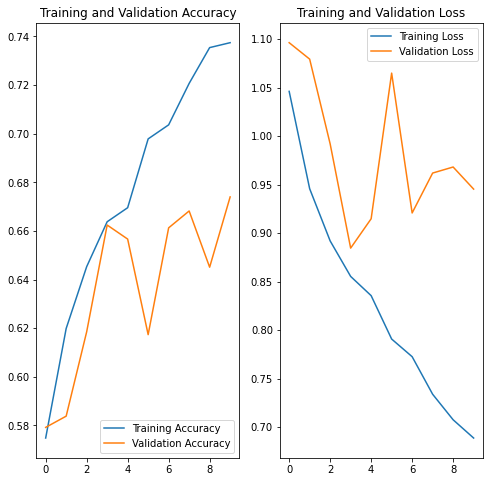

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**7. Save The Model**

In [33]:
model.save("flowers.h1")

In [34]:
model.save("flowers.m5")#another model to show the accuracy

**8. Test The Model**


In [35]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [36]:
model = load_model("/content/flowers.h1")

In [37]:
#Testing with a random rose image from Google

img = image.load_img("/content/drive/MyDrive/Flowers-Dataset/flowers/dandelion/10043234166_e6dd915111_n.jpg", target_size = (64,64) )

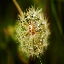

In [38]:
img

In [39]:
x = image.img_to_array(img)

In [40]:
x = np.expand_dims(x,axis = 0)

In [41]:
pred = model.predict(x)
pred

1/1 [==============================] - 0s 88ms/step


array([[-0.48353636,  4.485833  ,  0.6675467 , -2.456143  , -1.5114338 ]],
      dtype=float32)

In [42]:
class_names[np.argmax(pred)]

'dandelion'